In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Podzielmy zbiór na cechy oraz etykiety - to już znamy
# Dla uproszczenia wybieramy tylko cechę trzecią i czwartą, tj długość i szerokość płatków
X = iris.data[:, [2, 3]]
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator z trzema klastrami (klasami)
# Jak dotąd jest podobnie do Laboratorium 2
kmn = KMeans(n_clusters=3)

# Uczymy klasyfikator na danych treningowych
# Pierwsza różnica - uczenie przebiega bez nadzoru
# To znaczy nie pokazujemy klasyfikatorowi prawidłowych klas - gatunków kwiatów
# Zgodnie z konfiguracją wcześniej - powiedzieliśmy tylko że chcemy w zbiorze znaleźć 3 klasy
# Dokładny opis algorytmu: https://scikit-learn.org/stable/modules/clustering.html#k-means
kmn.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

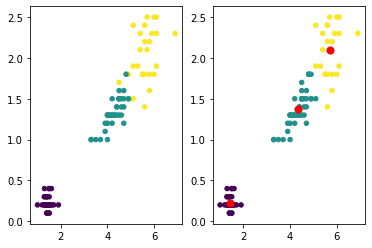

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Wyciągamy punkty centralne klastrów - pokażemy je na wykresie obok punktów ze zbioru uczącego
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# pierwszy wykres to nasz zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

# Teraz używamy danych treningowych żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

# Dokładamy na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

# Różnice kolorów pomiędzy wykresami są nieistotne

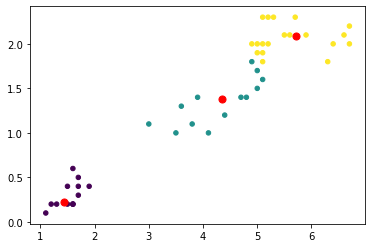

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

Attrs: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])
      MPG  cylinders  cubicInches  horsepower  weightLbs  time-to-sixty  \
0    14.0        4.0        350.0       165.0     4209.0           12.0   
1    31.9        1.0         89.0        71.0     1925.0           14.0   
2    17.0        4.0        302.0       140.0     3449.0           11.0   
3    15.0        4.0        400.0       150.0     3761.0           10.0   
4    30.5        1.0         98.0        63.0     2051.0           17.0   
..    ...        ...          ...         ...        ...            ...   
387  25.5        1.0        122.0        96.0     2300.0           16.0   
388  21.0        3.0        155.0       107.0     2472.0           14.0   
389  11.0        4.0        318.0       210.0     4382.0           14.0   
390  17.0        3.0        163.0       125.0     3140.0           14.0   
391  36.0        1.0        105.0        74.0     1980.0           15.0   

    

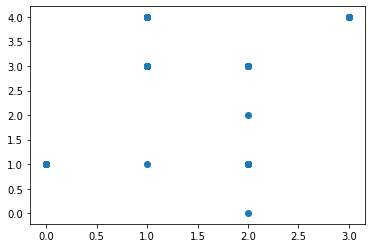

In [36]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns

samochody = fetch_openml('cars1')
print('Attrs:',samochody.keys())
samochody_df = pd.DataFrame(samochody['data'], columns=samochody['feature_names'])
print(samochody_df)

# Podziel zbiór danych na uczący i testowy.
X = samochody.data
y = samochody.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# Wytrenuj klasyfikator kNN
kmn = KMeans(n_clusters=4)
kmn.fit(X_train)
# Dokonaj predykcji na zbiorze testowym
y_pred = kmn.predict(X_test)
#tworzę sobie dataframe i przypisuję do niego wyniki predykcji jako wartość 'classes'
test_df = pd.DataFrame(X_test, columns=samochody['feature_names'])
test_df['classes'] = y_pred
#prezentuję wyniki jako pairplot z zaznaczeniem klas
sns.pairplot(test_df, vars=samochody['feature_names'], hue='classes')
#plt.scatter(X_test[:, 3], X_test[:, 1], c=y_pred, s=20)
plt.show()


In [ ]:
# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze
# Wyznaczone klasy odpowiadają mniej więcej podziałowi według wielkości pojazdu. W przypadku tych 4 klas można mówić o typach: samochody miejskie (niksa moc, spalanie, waga itp), kompaktowe, luksusowe, terenowe/pickup/SUV (duże silniki, duża moc, duża waga itp.)  

In [ ]:
samochody.keys()

In [ ]:
# Ściąga: Konwersja typów dla y

y = samochody['target']
y = [int(elem) for elem in y]
y[:5]